In [81]:
# load numeric data for preprocessing and modelling
import pandas as pd
df = pd.read_csv(r'datasets\crest-data-numeric.csv')

In [82]:
# to plots with matplotlib
%matplotlib inline

In [83]:
df.head(5)

,collection,document_number,release_decision,document_page_count,sequence_number,publication_date,content_type,collection_labels
0,General_CIA_Records,CIA-RDP88G01332R001301470016-9,RIPPUB,3.0,16,"October 31, 1986",MEMO,0
1,General_CIA_Records,CIA-RDP94B00280R001200040002-0,RIPPUB,10.0,2,"June 22, 1983",MEMO,0
2,General_CIA_Records,CIA-RDP80-00810A002500690001-1,RIPPUB,4.0,1,"November 3, 1953",REPORT,0
3,General_CIA_Records,CIA-RDP82-00457R008500360004-9,RIPPUB,2.0,4,"August 13, 1951",REPORT,0
4,General_CIA_Records,CIA-RDP70-00211R000100070047-1,RIPPUB,2.0,47,"January 5, 1953",REPORT,0


In [84]:
df.shape

(75000, 8)

In [85]:
df.columns

Index(['collection', 'document_number', 'release_decision',
       'document_page_count', 'sequence_number', 'publication_date',
       'content_type', 'collection_labels'],
      dtype='object')

In [86]:
# 1) convert the date time to pandas date time format and then extract day, month and year as features
df['publication_date'] = pd.to_datetime(df.publication_date)

In [87]:
df.publication_date.dt.year

0        1986
1        1983
2        1953
3        1951
4        1953
5        1988
6        1952
7        1949
8        1985
9        1962
10       1965
11       1987
12       1952
13       1984
14       1969
15       1987
16       1964
17       1979
18       1987
19       1955
20       1952
21       1959
22       1963
23       1953
24       1981
25       1951
26       1982
27       1952
28       1986
29       1984
         ... 
74970    1991
74971    1976
74972    1974
74973    1974
74974    1987
74975    1989
74976    1989
74977    1989
74978    1974
74979    1974
74980    1975
74981    1976
74982    1976
74983    1972
74984    1976
74985    1971
74986    1970
74987    1988
74988    1984
74989    1976
74990    1976
74991    1994
74992    1976
74993    1992
74994    1974
74995    1993
74996    1982
74997    1993
74998    1974
74999    1976
Name: publication_date, Length: 75000, dtype: int64

In [88]:
# create new feature for date, month and year separetly
df['publication_day'] = df.publication_date.dt.day
df['publication_month'] = df.publication_date.dt.month
df['publication_year'] = df.publication_date.dt.year

df.head(5)

,collection,document_number,release_decision,document_page_count,sequence_number,publication_date,content_type,collection_labels,publication_day,publication_month,publication_year
0,General_CIA_Records,CIA-RDP88G01332R001301470016-9,RIPPUB,3.0,16,1986-10-31,MEMO,0,31,10,1986
1,General_CIA_Records,CIA-RDP94B00280R001200040002-0,RIPPUB,10.0,2,1983-06-22,MEMO,0,22,6,1983
2,General_CIA_Records,CIA-RDP80-00810A002500690001-1,RIPPUB,4.0,1,1953-11-03,REPORT,0,3,11,1953
3,General_CIA_Records,CIA-RDP82-00457R008500360004-9,RIPPUB,2.0,4,1951-08-13,REPORT,0,13,8,1951
4,General_CIA_Records,CIA-RDP70-00211R000100070047-1,RIPPUB,2.0,47,1953-01-05,REPORT,0,5,1,1953


1941       15
1942       47
1943       89
1944       81
1945       79
1946       83
1947      185
1948      236
1949      423
1950      653
1951      657
1952      632
1953      710
1954      509
1955      457
1956      524
1957      560
1958      660
1959      567
1960      500
1961      535
1962      594
1963     1484
1964     2173
1965     2639
1966     2077
1967    16611
1968     1024
1969     1076
1970     1668
1971      787
1972     4966
1973      870
1974     4272
1975      535
1976     3307
1977      170
1978      209
1979      310
1980      773
1981      485
1982      969
1983    11548
1984      731
1985     1144
1986     1508
1987     1216
1988     1168
1989      527
1990      644
1991      288
1992      381
1993      251
1994      245
1995      110
1996        6
1999       20
2000       11
2001        1
Name: publication_year, dtype: int64


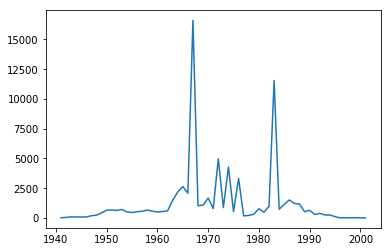

In [89]:
print(df.publication_year.value_counts().sort_index())
df.publication_year.value_counts().sort_index().plot()

1      3310
2      2999
3      3478
4      3324
5      3168
6      3173
7      3136
8      3166
9      2917
10    10355
11     3033
12    32941
Name: publication_month, dtype: int64


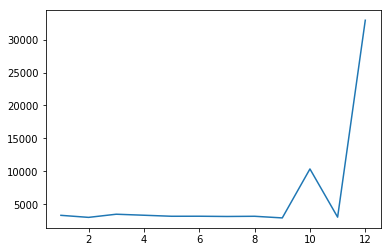

In [90]:
print(df.publication_month.value_counts().sort_index())
df.publication_month.value_counts().sort_index().plot()

1      7680
2      1067
3      1083
4      7685
5      1000
6      1030
7      1003
8      1058
9      1092
10     1131
11      966
12     1065
13     1010
14     1036
15     1146
16     1031
17     1029
18     1059
19     1085
20     1090
21     1028
22     1051
23     1074
24      953
25      918
26      986
27     1032
28     1036
29      924
30      949
31    30703
Name: publication_day, dtype: int64


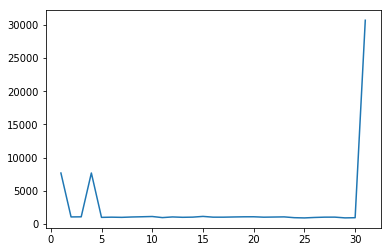

In [91]:
print(df.publication_day.value_counts().sort_index())
df.publication_day.value_counts().sort_index().plot()

In [92]:
# check the data duration
df.publication_year.max() - df.publication_year.min()
# we have 60 years of data

60

In [93]:
# check the types of the features/columns
df.dtypes

collection                     object
document_number                object
release_decision               object
document_page_count           float64
sequence_number                 int64
publication_date       datetime64[ns]
content_type                   object
collection_labels               int64
publication_day                 int64
publication_month               int64
publication_year                int64
dtype: object

In [95]:
# 2) checking and extracting features from doc number
df['sub_department'] = df.document_number.str.slice(4,7)


RDP    72546
HAK     2454
Name: sub_department, dtype: int64


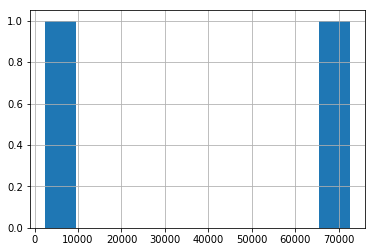

In [96]:
print(df['sub_department'].value_counts())
df['sub_department'].value_counts().hist()

In [97]:
# convert sub department into numeric features
# replace values of release decsions with their freq dist
df['sub_department_num'] = df['sub_department'].map({'RDP': 1 ,
                                                   'HAK': 0
                                               })

In [98]:
# checking and extracting features from doc number
#df['job_number'] = df.document_number.str.slice(4,7)
df['check_digit'] = df.document_number.str.slice(-1, )

# and that's enough from the document number, because the number format is little bit different for different instances of
# the dataset---- we can remove document number and keep sub_department and check_digit

In [99]:
# convert the type from object to int
df['check_digit'] = df['check_digit'].astype(int)


In [100]:
df['check_digit'].value_counts()

6    7816
0    7591
3    7553
1    7536
5    7499
2    7492
7    7417
8    7403
4    7385
9    7308
Name: check_digit, dtype: int64

In [101]:
# 3) categorical to numerical variable based on their frequency distribution
print(df['release_decision'].value_counts())
release_descision_freq = df.release_decision.value_counts().tolist()
print(release_descision_freq)
print(sum(release_descision_freq))

release_descision_freq_dist = [x / sum(release_descision_freq) for x in release_descision_freq]

print(release_descision_freq_dist)

RIPPUB    38152
RIF       29692
RIFPUB     4498
RIPLIM     1480
RIFLIM      974
RIP         204
Name: release_decision, dtype: int64
[38152, 29692, 4498, 1480, 974, 204]
75000
[0.5086933333333333, 0.3958933333333333, 0.05997333333333333, 0.019733333333333332, 0.012986666666666667, 0.00272]


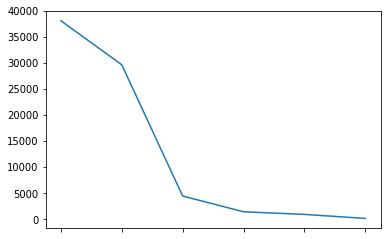

In [102]:
df['release_decision'].value_counts().plot()

In [103]:
# replace values of release decsions with their freq dist
df['release_decision_num'] = df['release_decision'].map({'RIPPUB': release_descision_freq_dist[0] ,
                                       'RIF': release_descision_freq_dist[1] ,
                                       'RIFPUB' : release_descision_freq_dist[2],
                                       'RIPLIM': release_descision_freq_dist[3],
                                       'RIFLIM': release_descision_freq_dist[4],
                                       'RIP' : release_descision_freq_dist[5]
                                       })


In [104]:
df['release_decision_num'].value_counts()

0.508693    38152
0.395893    29692
0.059973     4498
0.019733     1480
0.012987      974
0.002720      204
Name: release_decision_num, dtype: int64

In [105]:
df['content_type'].value_counts().sort_index()

ABSTRACTS              15000
AG                        60
BIO                        3
BOOK                       8
BR                         4
BRIEF                    623
BULL                      70
CABLE                   4340
CAPCARD                 6709
CHART                     25
CIAPER                    18
CONT                     215
DCID                       1
DISP                      21
FORM                    1038
HW                       616
IM                       181
IR                       772
IRR                        8
IS                         2
LETTER                  1500
LIST                     197
MAGAZINE                  61
MAP                       22
MEMO                    4871
MF                      2475
MFR                      707
MIN                      213
MISC                    1513
NIE                       46
NIS                        2
NOTES                    504
NSPR                     835
OPEN                     151
OPEN SOURCE   

In [106]:
# 4) content type: categorical to numerical variable based on their frequency distribution

#content_type_keys = df[['content_type']].drop_duplicates().tolist()
#content_type_keys = content_type_keys.tolist()
content_type_keys = df['content_type'].drop_duplicates().values.tolist()
content_type_keys.sort()
#content_type_keys = content_type_keys.sort()
print(content_type_keys)


content_type_values = df.content_type.value_counts().sort_index().tolist()
print(content_type_values)
content_type_values = [x / sum(content_type_values) for x in content_type_values]
print(content_type_values)

content_type_dict = dict(zip(content_type_keys, content_type_values))
print(content_type_dict)


['ABSTRACTS', 'AG', 'BIO', 'BOOK', 'BR', 'BRIEF', 'BULL', 'CABLE', 'CAPCARD', 'CHART', 'CIAPER', 'CONT', 'DCID', 'DISP', 'FORM', 'HW', 'IM', 'IR', 'IRR', 'IS', 'LETTER', 'LIST', 'MAGAZINE', 'MAP', 'MEMO', 'MF', 'MFR', 'MIN', 'MISC', 'NIE', 'NIS', 'NOTES', 'NSPR', 'OPEN', 'OPEN SOURCE', 'OUTLINE', 'PAPER', 'PERRPT', 'PHOTO', 'PREL', 'REGULATION', 'REPORT', 'REQ', 'RP', 'RS', 'SCIENCEAB', 'SCIENTIFIC ABSTR', 'SCIENTIFIC ABSTRACT', 'SE', 'SNIE', 'SPEECH', 'SS', 'STATEMENT', 'STUDY', 'SUMMARY', 'TDCS', 'TELEGRAM', 'TRANS', 'TRIP']
[15000, 60, 3, 8, 4, 623, 70, 4340, 6709, 25, 18, 215, 1, 21, 1038, 616, 181, 772, 8, 2, 1500, 197, 61, 22, 4871, 2475, 707, 213, 1513, 46, 2, 504, 835, 151, 2224, 28, 86, 164, 150, 30, 204, 11951, 1274, 85, 23, 1617, 372, 12956, 2, 26, 10, 63, 98, 57, 680, 7, 12, 61, 9]
[0.2, 0.0008, 4e-05, 0.00010666666666666667, 5.333333333333333e-05, 0.008306666666666667, 0.0009333333333333333, 0.057866666666666663, 0.08945333333333333, 0.0003333333333333333, 0.00024, 0.00286

In [107]:
# now map these freq dist valeus to the dataframe 

# replace values of release decsions with their freq dist
df['content_type_num'] = df['content_type'].map(content_type_dict)


In [108]:
df['content_type_num'].value_counts()

0.200000    15000
0.172747    12956
0.159347    11951
0.089453     6709
0.064947     4871
0.057867     4340
0.033000     2475
0.029653     2224
0.021560     1617
0.020173     1513
0.020000     1500
0.016987     1274
0.013840     1038
0.011133      835
0.010293      772
0.009427      707
0.009067      680
0.008307      623
0.008213      616
0.006720      504
0.004960      372
0.002867      215
0.002840      213
0.002720      204
0.002627      197
0.002413      181
0.002187      164
0.002013      151
0.002000      150
0.000813      122
0.001307       98
0.001147       86
0.001133       85
0.000933       70
0.000840       63
0.000800       60
0.000760       57
0.000613       46
0.000400       30
0.000373       28
0.000347       26
0.000333       25
0.000307       23
0.000293       22
0.000280       21
0.000240       18
0.000107       16
0.000160       12
0.000133       10
0.000120        9
0.000093        7
0.000027        6
0.000053        4
0.000040        3
0.000013        1
Name: cont

In [109]:
df.head(5)

,collection,document_number,release_decision,document_page_count,sequence_number,publication_date,content_type,collection_labels,publication_day,publication_month,publication_year,sub_department,sub_department_num,check_digit,release_decision_num,content_type_num
0,General_CIA_Records,CIA-RDP88G01332R001301470016-9,RIPPUB,3.0,16,1986-10-31,MEMO,0,31,10,1986,RDP,1,9,0.508693,0.064947
1,General_CIA_Records,CIA-RDP94B00280R001200040002-0,RIPPUB,10.0,2,1983-06-22,MEMO,0,22,6,1983,RDP,1,0,0.508693,0.064947
2,General_CIA_Records,CIA-RDP80-00810A002500690001-1,RIPPUB,4.0,1,1953-11-03,REPORT,0,3,11,1953,RDP,1,1,0.508693,0.159347
3,General_CIA_Records,CIA-RDP82-00457R008500360004-9,RIPPUB,2.0,4,1951-08-13,REPORT,0,13,8,1951,RDP,1,9,0.508693,0.159347
4,General_CIA_Records,CIA-RDP70-00211R000100070047-1,RIPPUB,2.0,47,1953-01-05,REPORT,0,5,1,1953,RDP,1,1,0.508693,0.159347


In [110]:
df['sub_department'].value_counts()

RDP    72546
HAK     2454
Name: sub_department, dtype: int64

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 16 columns):
collection              75000 non-null object
document_number         75000 non-null object
release_decision        75000 non-null object
document_page_count     75000 non-null float64
sequence_number         75000 non-null int64
publication_date        75000 non-null datetime64[ns]
content_type            75000 non-null object
collection_labels       75000 non-null int64
publication_day         75000 non-null int64
publication_month       75000 non-null int64
publication_year        75000 non-null int64
sub_department          75000 non-null object
sub_department_num      75000 non-null int64
check_digit             75000 non-null int32
release_decision_num    75000 non-null float64
content_type_num        75000 non-null float64
dtypes: datetime64[ns](1), float64(3), int32(1), int64(6), object(5)
memory usage: 8.9+ MB


In [112]:
df.columns

Index(['collection', 'document_number', 'release_decision',
       'document_page_count', 'sequence_number', 'publication_date',
       'content_type', 'collection_labels', 'publication_day',
       'publication_month', 'publication_year', 'sub_department',
       'sub_department_num', 'check_digit', 'release_decision_num',
       'content_type_num'],
      dtype='object')

In [113]:
# drop the columsn which are categorical and keep their new numeric features and save df_numeric file for further processing
df_numeric = df[['document_page_count', 'sequence_number', 'collection_labels', 'publication_day',
       'publication_month', 'publication_year', 'check_digit', 'release_decision_num', 'content_type_num', 
         'sub_department_num']]

In [118]:
df_numeric.head(5)

,document_page_count,sequence_number,collection_labels,publication_day,publication_month,publication_year,check_digit,release_decision_num,content_type_num,sub_department_num
0,3.0,16,0,31,10,1986,9,0.508693,0.064947,1
1,10.0,2,0,22,6,1983,0,0.508693,0.064947,1
2,4.0,1,0,3,11,1953,1,0.508693,0.159347,1
3,2.0,4,0,13,8,1951,9,0.508693,0.159347,1
4,2.0,47,0,5,1,1953,1,0.508693,0.159347,1


In [119]:
df.to_csv(r'datasets\1b-crest-after-numeric-preprocessing.csv', 
                    index=False)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 16 columns):
collection              75000 non-null object
document_number         75000 non-null object
release_decision        75000 non-null object
document_page_count     75000 non-null float64
sequence_number         75000 non-null int64
publication_date        75000 non-null datetime64[ns]
content_type            75000 non-null object
collection_labels       75000 non-null int64
publication_day         75000 non-null int64
publication_month       75000 non-null int64
publication_year        75000 non-null int64
sub_department          75000 non-null object
sub_department_num      75000 non-null int64
check_digit             75000 non-null int32
release_decision_num    75000 non-null float64
content_type_num        75000 non-null float64
dtypes: datetime64[ns](1), float64(3), int32(1), int64(6), object(5)
memory usage: 8.9+ MB


In [116]:
df.groupby(['publication_month', 'collection'])['publication_year'].count()


publication_month  collection               
1                  General_CIA_Records           1294
                   Misc                           791
                   NGA_Records                   1225
2                  General_CIA_Records           1185
                   Misc                           627
                   NGA_Records                   1187
3                  General_CIA_Records           1401
                   Misc                           758
                   NGA_Records                   1319
4                  General_CIA_Records           1281
                   Misc                           758
                   NGA_Records                   1285
5                  General_CIA_Records           1292
                   Misc                           741
                   NGA_Records                   1135
6                  General_CIA_Records           1250
                   Misc                           573
                   NGA_Records       

NameError: name 'plt' is not defined

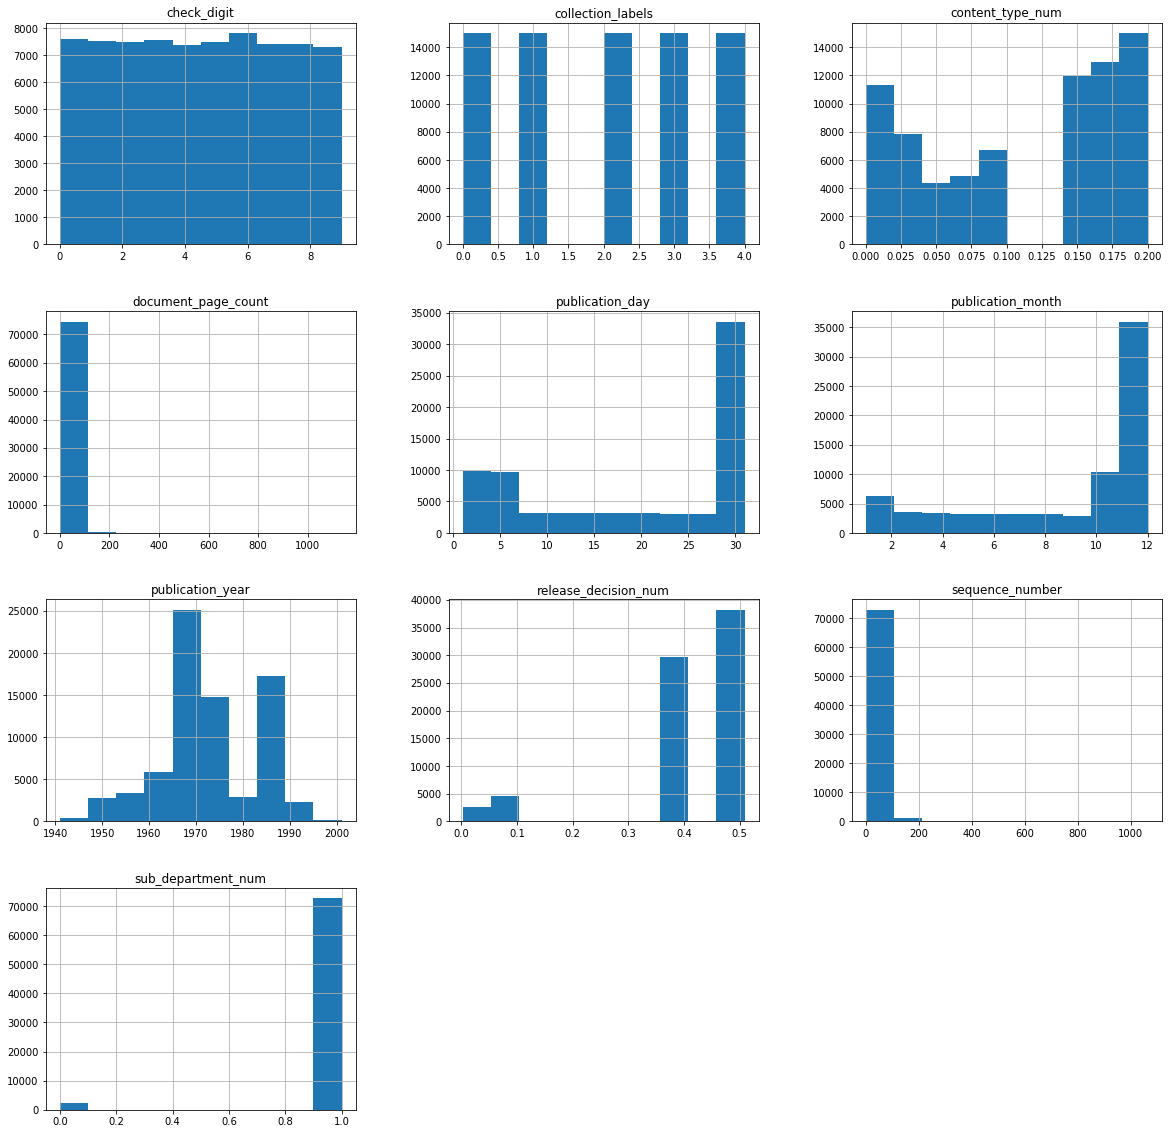

In [117]:
# plot histogram for each parameter
df.hist(figsize=(20,20))
plt.show()